In [1]:
import pandas as pd

df = pd.read_csv("Independence100.csv" , encoding = "utf-8")

df

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0
...,...,...,...,...,...,...,...
95,96,George's at the Cove,12194000.0,80,La Jolla,Calif.,250000.0
96,97,Le Coucou,12187523.0,95,New York,N.Y.,87070.0
97,98,Mi Vida,12032014.0,38,Washington,D.C.,226226.0
98,99,Upland,11965564.0,52,New York,N.Y.,171825.0


In [2]:
df1 = pd.DataFrame()
df1['x'] = df['Average Check']
df1['y'] = df['Sales']
df1

,x,y
0,40,39080335.0
1,43,35218364.0
2,33,29104017.0
3,90,26916180.0
4,62,26900000.0
...,...,...
95,80,12194000.0
96,95,12187523.0
97,38,12032014.0
98,52,11965564.0


In [3]:
import matplotlib.pyplot as plt
from sklearn import cluster , datasets , metrics
from sklearn.cluster import KMeans

n_clusters = 3  #將資料分幾群

kmeans = cluster.KMeans(n_clusters).fit(df1)
#fit() 求算出基礎統計資料供KMeans()使用

kmeans

KMeans(n_clusters=3)

[[7.82702703e+01 1.82372292e+07]
 [7.90476190e+01 2.55201465e+07]
 [5.59285714e+01 1.36343541e+07]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


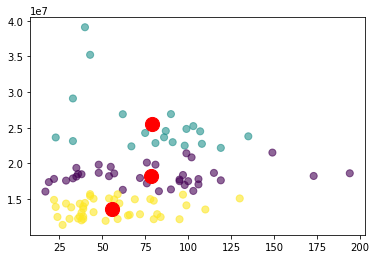

In [4]:
centroids = kmeans.cluster_centers_
print(centroids)

cluster_labels = kmeans.labels_
print(cluster_labels)

#scatter() 內接收第四個參數為資料點漸層係數，數值越小越透明

plt.scatter(df1['x'] , df1['y'] , c = kmeans.labels_ , s = 50 , alpha = 0.6)

#接續執行第二個scatter()，第一個接收參數為array中的第0欄所有資料，c為中心點顏色，s為深淺度，alpha為透明度

plt.scatter(centroids[: , 0] , centroids[: , 1] , c = 'red' , s = 200)

Text(0, 0.5, 'SSE value')

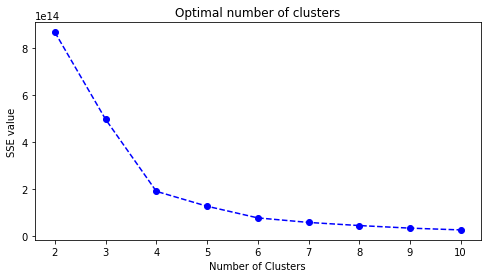

In [5]:
SSE = []

k = range(2 , 11)

for x in k:
    kmean_optimized = KMeans(n_clusters = x)
    kmean_optimized.fit(df1)
    SSE.append(kmean_optimized.inertia_)  #計算inertia_，即SSE
    
    
plt.figure(figsize = (8,4))
plt.plot(k , SSE , 'bo--')
plt.title("Optimal number of clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE value")